# Introduction to working with sound in python

These are series of python notebooks that are my attempt at providing an introduction to both python and working with sound.  This first one starts with the basics.

To begin, it should be recognized that sound travels (propagates) as a wave, so let's first get comfortable working in python to generate and plot generic waves.

To do this we will make use of the python modules for numerics and arrays (numpy) and for plotting (matplotlib)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Next, include this "backend" to show our plots on this page; alternately we could use "tk" to show them in a separate window

In [2]:
%matplotlib inline

Okay, to start, let's try and create a wave, more specifically a sine curve, with a set frequency and amplitude.  In this example we will use a standard musical note (A4) which is 440 Hz (cycles per second).  Check out http://www.szynalski.com/tone-generator to get different ones.  

First we'll define the time period to run for "P" seconds, and our resolution will be "time_res" seconds.  We will then make a sine curve.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


Text(0.5, 0, 'Time (seconds)')

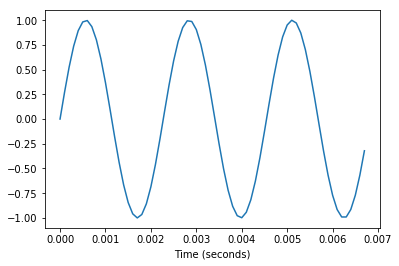

In [3]:
# define our desired wave frequency in Hz, or cycles/second
# C4 = 261.626 (middle C)
# A4 = 440
# C6 = 1046.502
input_frequency = 440

# set the total length of the time-series (wave) in seconds; when converted to a sound file this will be the 
# the length of time the sound plays; here we set it to ten seconds.
P = 10.0

# now set the time resolution, here 1 milisecond
time_res = 0.0001

# next we create the time axis; this can be done via np.arange (specify the start, stop and increment), or
# via np.linspace (specify the start, stop and number of points)

# method 1: use linspace, specify total number of points (points per second * number seconds) or (RATE*P)
RATE = 1/time_res
time = np.linspace(0,P,RATE*P)

# method 2: use arange, specify the delta-time, compute the number of points per second (RATE)
#time = np.arange(0, P, time_res)
#RATE = len(time)/P

# convert the desired frequency from cycles/second to radians/second
frequency = 2.0 * np.pi * input_frequency

# make wave
wave = np.sin(frequency*time)

# now plot; note here that with 440 cycles per second a plot of the entire time range of 3 seconds will have 3*440
#   cycles (too many to see).  Instead let's focus on the first 68 points (0 to 0.0068 seconds).  This should give
#   about three cycles (3/440=0.0068)
#   
plt.plot(time[0:68],wave[0:68])
plt.xlabel('Time (seconds)')

To play this as an audio file we use the python function "Audio" found in the module "IPython.display"

In [4]:
import IPython.display as ipd

# here the syntax is ipd.Audio(wave variable name, rate=sampling rate);
# the sampling rate is given either
# we should hear a tone at frequency given by "input_frequency" and duration given by "P"
ipd.Audio(wave,rate=RATE)

We now want to make a spectrum.  This essentially converts the signal from a waveform (function of time) to power (function of frequency)

Text(0, 0.5, 'Power')

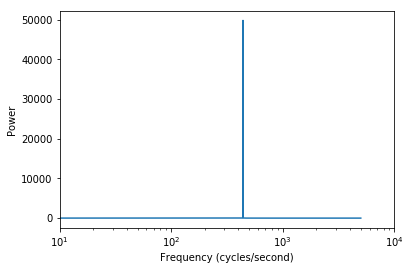

In [11]:
spec = np.abs(np.fft.rfft(wave))
f = np.linspace(0, RATE/2, len(spec))
plt.xlim(10,10000)
plt.semilogx(f,spec)
plt.xlabel('Frequency (cycles/second)')
plt.ylabel('Power')

Since, typically, sound is a continuous wave while spectra are run over discrete subsets, a different way of looking at frequency peaks is via a spectrogram, essentially a spectrum over discrete subsets that is continuously update.  Here we have to define the "subsets" or number of spectra that are run.

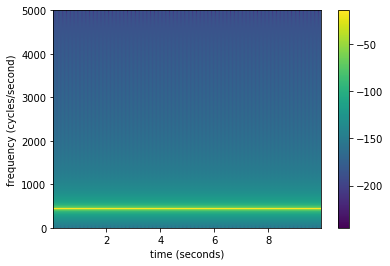

In [12]:
NFFT = 1024
Pxx, freqs, bins, im = plt.specgram(wave, NFFT=NFFT, Fs=1.0/time_res, noverlap=900)
plt.ylabel('frequency (cycles/second)')
plt.xlabel('time (seconds)')
plt.colorbar()

Let's now try to expand this.  Since each note has a specific frequency, let's try concatonate a bunch of sounds together.

In [13]:
# first let's define some notes on the main scale
E = 2.0 * np.pi * 330.0
D = 2.0 * np.pi * 294.0
C = 2.0 * np.pi * 262.0

# now set the "song" to be a series of seven notes, one after the other, E-D-C-D-E-E-E
# and we'll "play" each note for one second; our total waveform will now be seven seconds long
P = 7
RATE = int(RATE)
time = np.linspace(0,P,RATE*P)
wave = np.sin(E*time[1:RATE])
wave = np.append(wave,np.sin(D*time[RATE:2*RATE]))
wave = np.append(wave,np.sin(C*time[2*RATE:3*RATE]))
wave = np.append(wave,np.sin(D*time[3*RATE:4*RATE]))
wave = np.append(wave,np.sin(E*time[4*RATE:5*RATE]))
wave = np.append(wave,np.sin(E*time[5*RATE:6*RATE]))
wave = np.append(wave,np.sin(E*time[6*RATE:7*RATE]))
ipd.Audio(wave,rate=RATE)

What does the spectrum of this show?

Text(0, 0.5, 'Power')

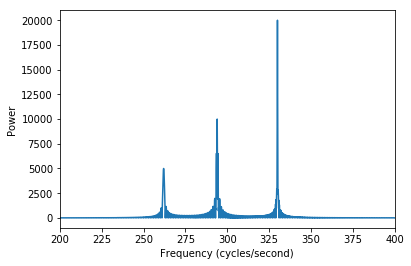

In [14]:
spec = np.abs(np.fft.rfft(wave))
f = np.linspace(0, RATE/2, len(spec))
plt.xlim(200,400)
plt.plot(f,spec)
plt.xlabel('Frequency (cycles/second)')
plt.ylabel('Power')

Now the spectrogram might be more interesting, since the notes (frequency) changes over time

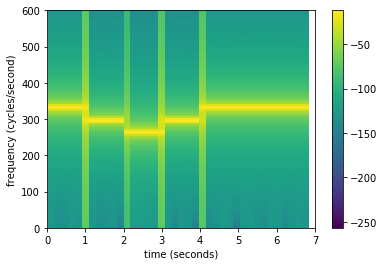

In [15]:
Pxx, freqs, bins, im = plt.specgram(wave, NFFT=2048, Fs=RATE, noverlap=256)
plt.ylim(0,600)
plt.xlim(0,P)
plt.ylabel('frequency (cycles/second)')
plt.xlabel('time (seconds)')
plt.colorbar()